# DATA OVERVIEW

https://www.basketball-reference.com/friv/mvp.html

1955-56 through 1979-1980: Voting was done by players. Rules prohibited player from voting for himself or any teammate.

1980-81 to present: Voting conducted by media.

Voting tallies for seasons 1965-66, 1966-67, 1967-68, 1968-69, 1970-71, and 1978-79 are incomplete.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
path = r'C:\Users\fnurr\Documents\WORKPLACE\NBA MVP Prediction\dataset'

In [4]:
def f(i):
    data = pd.read_html(i, header=0, skiprows=1)
    season = i.split('-')[-2] + '-' + i.split('-')[-1].split('.')[0]
    data[0]['Season'] = season
    return data[0]

filepaths = [path+'\\'+f for f in os.listdir(path) if f.endswith('.xls')]
df = pd.concat(map(f, filepaths))
df.reset_index(drop=True, inplace=True)
df

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Season
0,1,Bob Pettit,23,STL,33.0,33.0,80,0.413,72,38.8,25.7,16.2,2.6,NaN,NaN,0.429,NaN,0.736,13.8,0.236,1955-1956
1,2,Paul Arizin,27,PHW,21.0,21.0,80,0.263,72,37.8,24.2,7.5,2.6,NaN,NaN,0.448,NaN,0.810,12.2,0.214,1955-1956
2,3,Bob Cousy,27,BOS,11.0,11.0,80,0.138,72,38.4,18.8,6.8,8.9,NaN,NaN,0.360,NaN,0.844,6.8,0.119,1955-1956
3,4,Mel Hutchins,27,FTW,9.0,9.0,80,0.113,66,33.9,12.0,7.5,2.7,NaN,NaN,0.425,NaN,0.643,4.4,0.095,1955-1956
4,5T,Dolph Schayes,27,SYR,2.0,2.0,80,0.025,72,35.0,20.4,12.4,2.8,NaN,NaN,0.387,NaN,0.858,11.8,0.225,1955-1956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,22.2,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2020-2021
1007,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,14.3,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2020-2021
1008,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,24.6,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2020-2021
1009,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,25.0,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2020-2021


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Rank         0
Player       0
Age          0
Tm           0
First        0
Pts Won      0
Pts Max      0
Share        0
G            0
MP           0
PTS          0
TRB          0
AST          0
STL        216
BLK        216
FG%          0
3P%        352
FT%          0
WS           0
WS/48        0
Season       0
dtype: int64

In [7]:
df = df.fillna(0)
df.isna().any().sum()

0

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     1011 non-null   object 
 1   Player   1011 non-null   object 
 2   Age      1011 non-null   int64  
 3   Tm       1011 non-null   object 
 4   First    1011 non-null   float64
 5   Pts Won  1011 non-null   float64
 6   Pts Max  1011 non-null   int64  
 7   Share    1011 non-null   float64
 8   G        1011 non-null   int64  
 9   MP       1011 non-null   float64
 10  PTS      1011 non-null   float64
 11  TRB      1011 non-null   float64
 12  AST      1011 non-null   float64
 13  STL      1011 non-null   float64
 14  BLK      1011 non-null   float64
 15  FG%      1011 non-null   float64
 16  3P%      1011 non-null   float64
 17  FT%      1011 non-null   float64
 18  WS       1011 non-null   float64
 19  WS/48    1011 non-null   float64
 20  Season   1011 non-null   object 
dtypes: float64(14)

In [14]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['Age',
 'First',
 'Pts Won',
 'Pts Max',
 'Share',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'FG%',
 '3P%',
 'FT%',
 'WS',
 'WS/48']

In [13]:
# df['Rank'].unique()

In [11]:
# df['Rank'] = df['Rank'].apply(lambda x: str(x))
# df['Tied'] = df['Rank'].apply(lambda x: True if x.str.contains('T'))

In [19]:
y_train_label = 'Share'
y_train = df[y_train_label].copy()

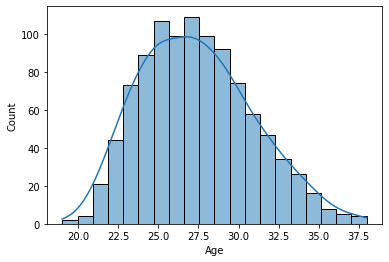

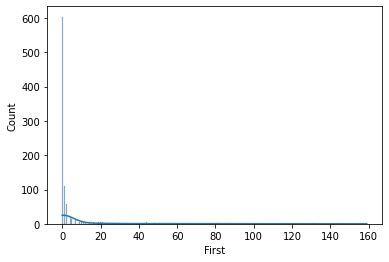

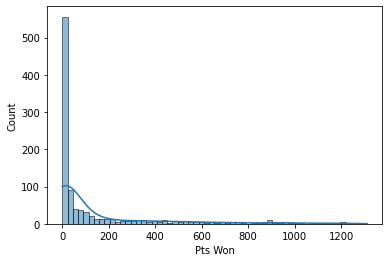

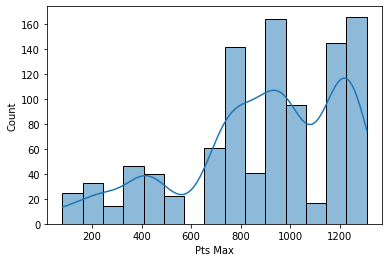

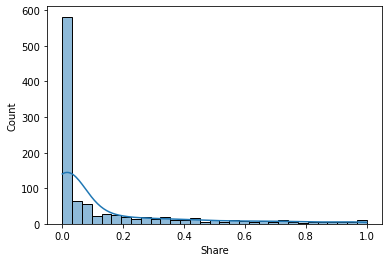

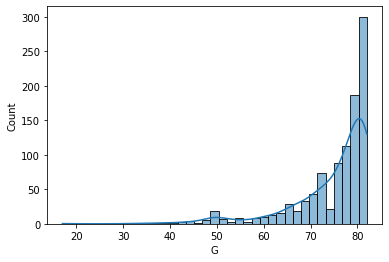

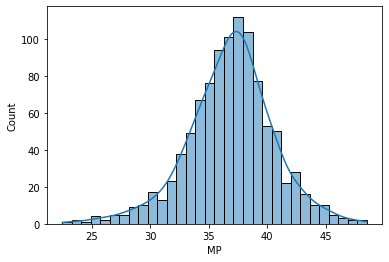

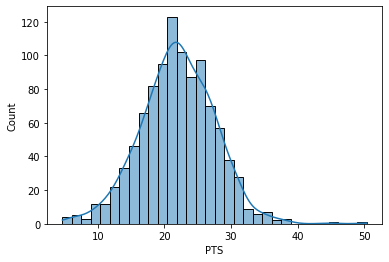

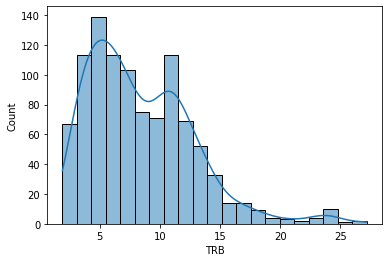

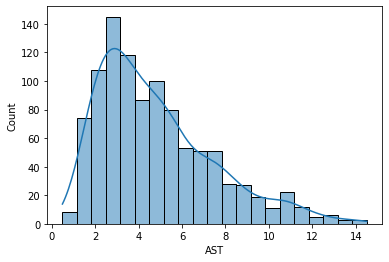

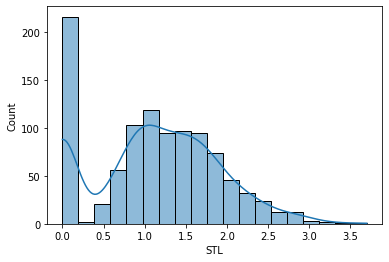

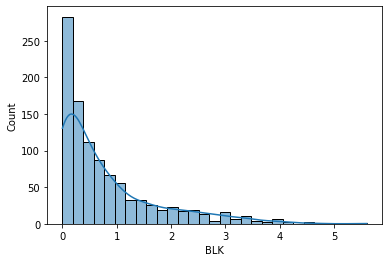

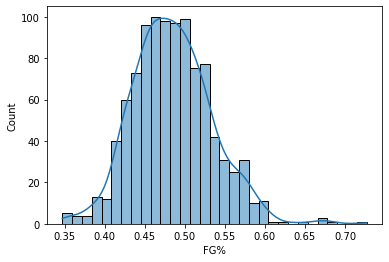

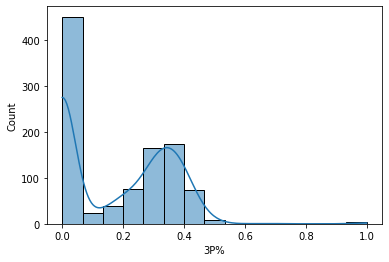

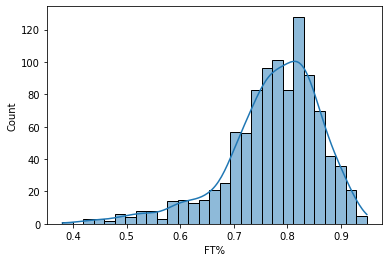

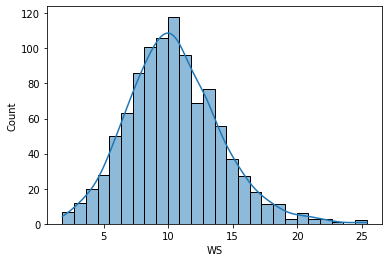

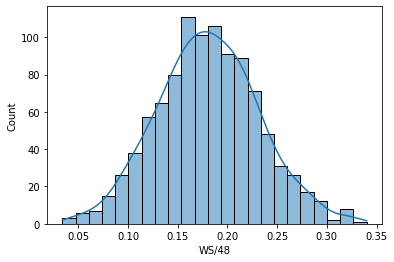

In [17]:
for col in num_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.show()

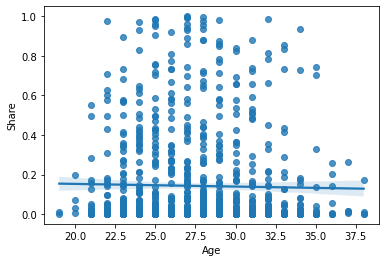

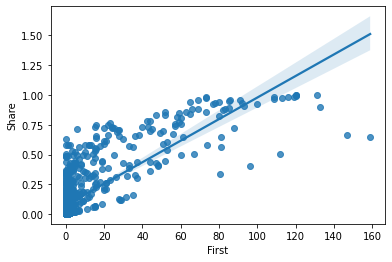

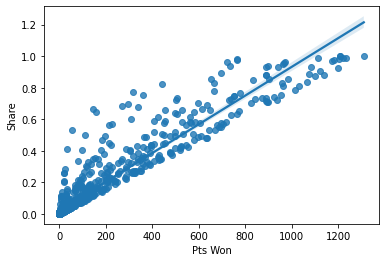

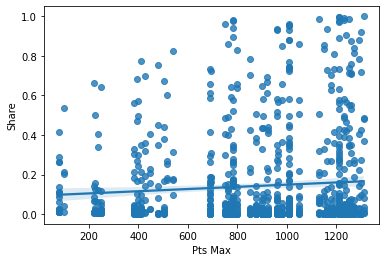

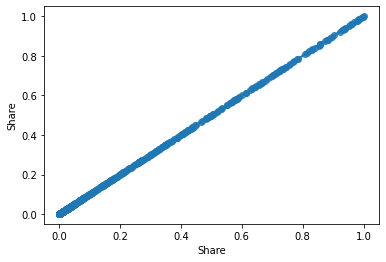

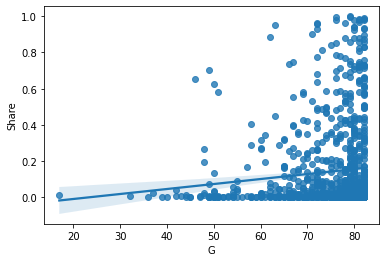

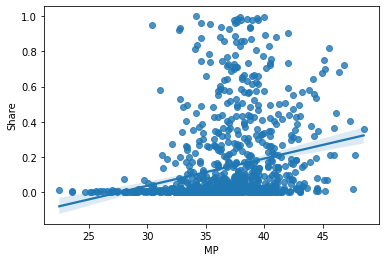

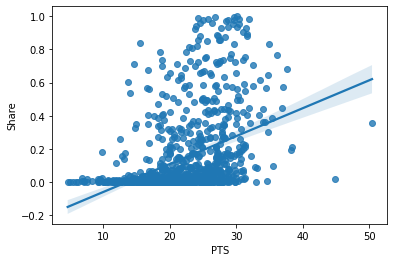

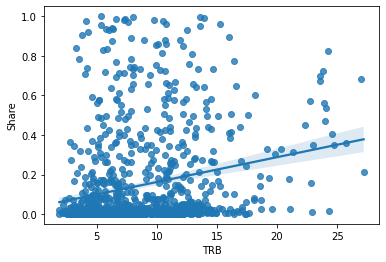

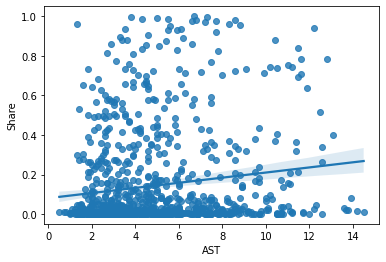

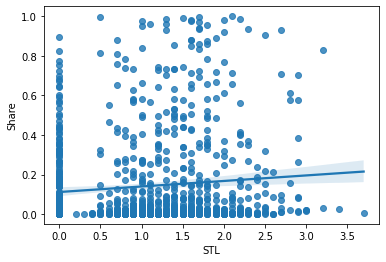

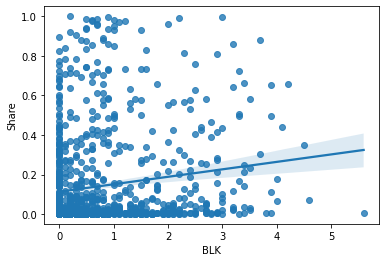

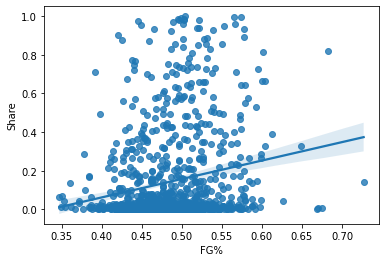

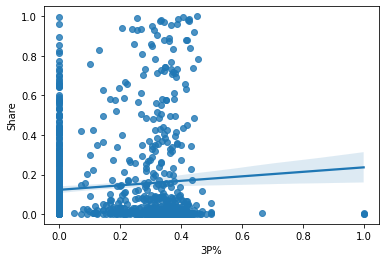

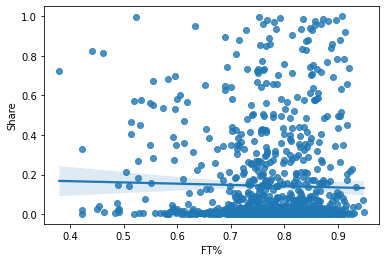

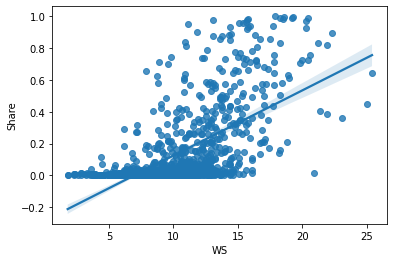

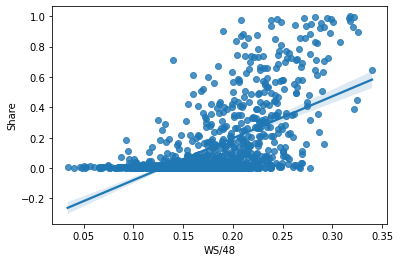

In [20]:
for col in num_cols:
    sns.regplot(data=df, x=col, y=y_train_label)
    plt.show()

# FEATURE EXTRACTION

PLAYER EFFICIENCY = (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP

+/- – the plus/minus statistic is a measure of the point differential when players are in and out of a game. It is calculated by taking the difference in the score when the player enters the game and subtracting it from the score when the player exits the game. These differences are added up over the entire game to give the score. Thus, it is a measure of the impact a player has on the score of the game when he is in the game without measuring any specific statistic.

team name and team record during season

In [22]:
columns = [col for col in df.columns if col not in ['Rank','Tm','WS','WS/48']]
print(columns)

['Player', 'Age', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'Season']


## Feature Transformation

In [90]:
for col in eda_columns:
    if col != 'Share':
        df[col] = df[col].apply(lambda x: np.log(x) if x!=0 else 1)

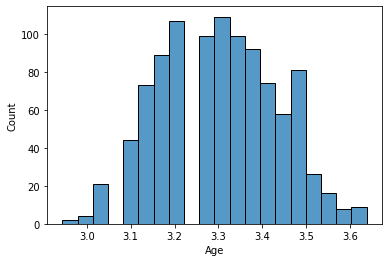

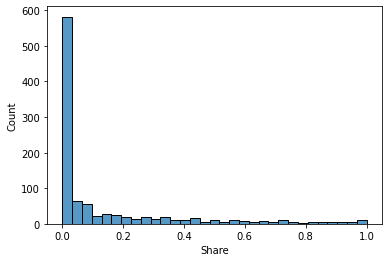

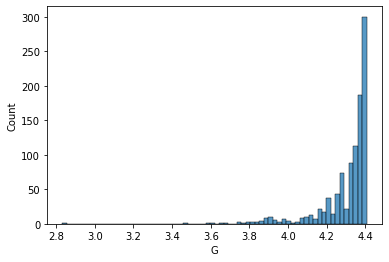

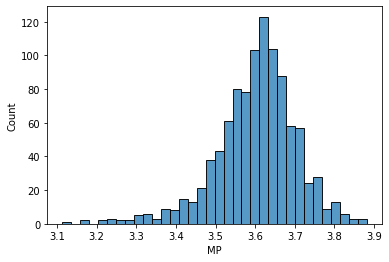

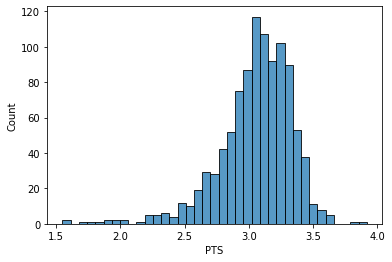

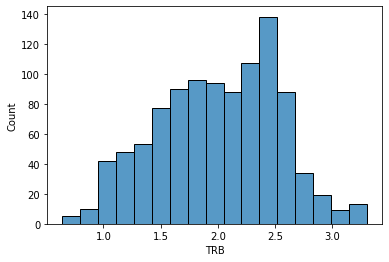

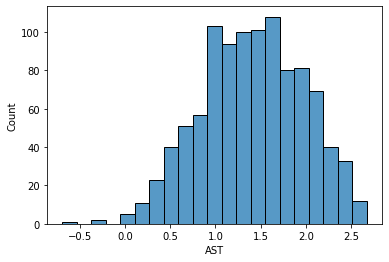

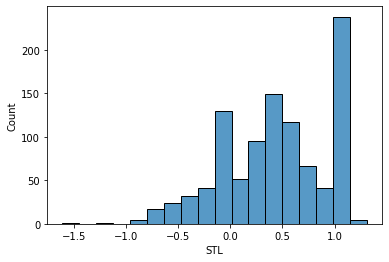

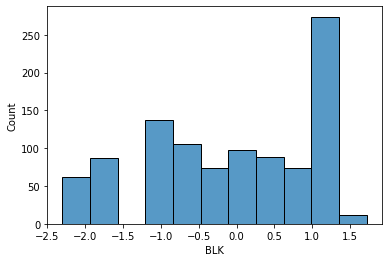

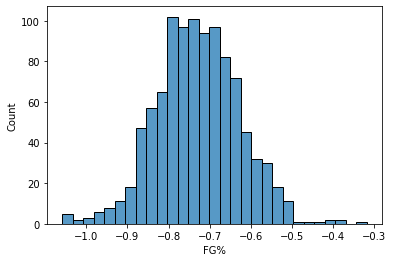

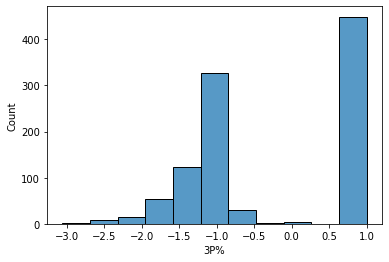

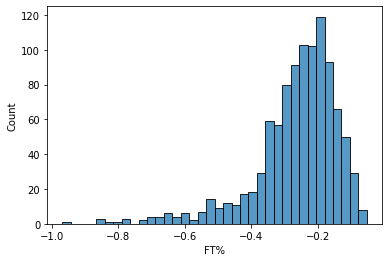

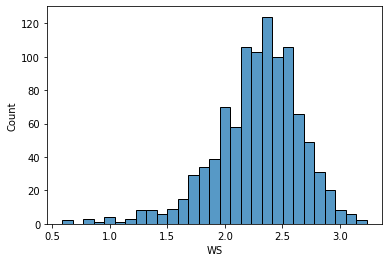

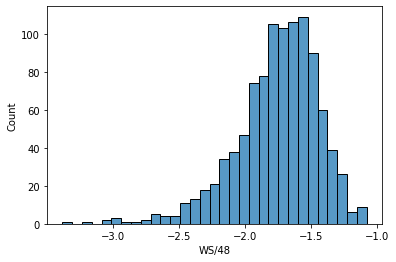

In [91]:
for col in eda_columns:
    sns.histplot(data=df, x=col)
    plt.show()

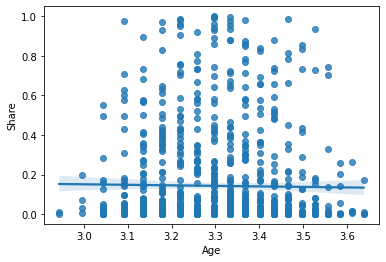

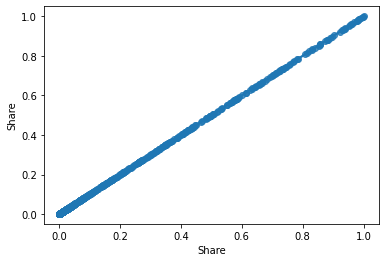

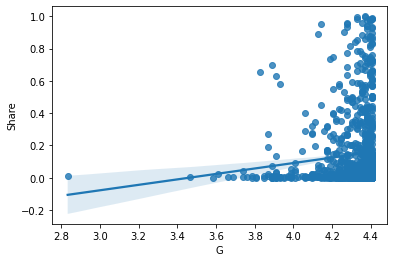

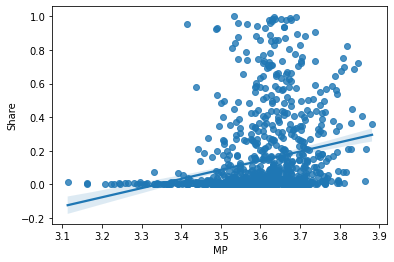

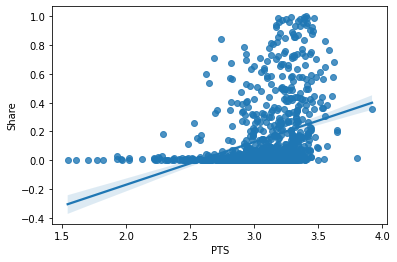

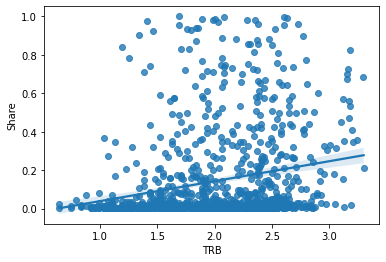

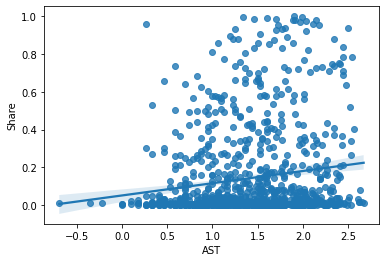

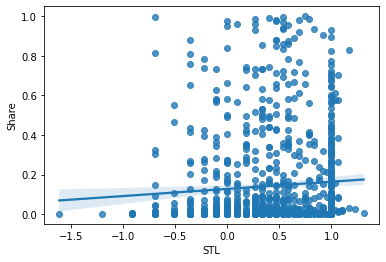

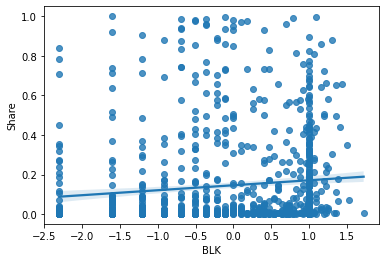

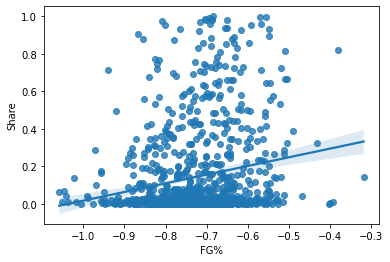

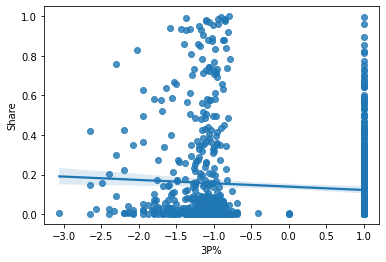

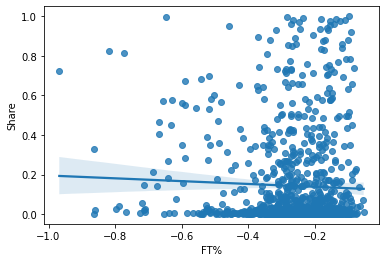

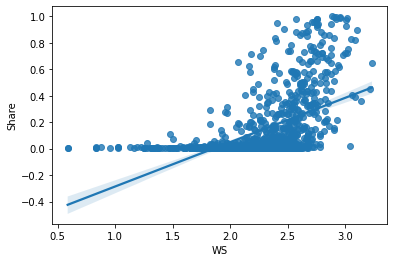

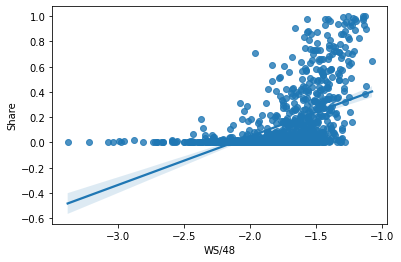

In [92]:
for col in eda_columns:
    sns.regplot(data=df, x=col, y='Share')
    plt.show()

In [93]:
data = df.copy()

In [94]:
rm_col = ['Player','Tm','Pts Won','First','Rank','Pts Max','Season']
data = df[[col for col in df.columns if col not in rm_col]]

In [95]:
data.head()

,Age,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,3.135494,0.413,4.276666,3.658420,3.246491,2.785011,0.955511,1.0,1.0,-0.846298,1.0,-0.306525,2.624669,-1.443923
1,3.295837,0.263,4.276666,3.632309,3.186353,2.014903,0.955511,1.0,1.0,-0.802962,1.0,-0.210721,2.501436,-1.541779
2,3.295837,0.138,4.276666,3.648057,2.933857,1.916923,2.186051,1.0,1.0,-1.021651,1.0,-0.169603,1.916923,-2.128632
3,3.295837,0.113,4.189655,3.523415,2.484907,2.014903,0.993252,1.0,1.0,-0.855666,1.0,-0.441611,1.481605,-2.353878
4,3.295837,0.025,4.276666,3.555348,3.015535,2.517696,1.029619,1.0,1.0,-0.949331,1.0,-0.153151,2.468100,-1.491655


In [96]:
columns = [col for col in data.columns if col!='Share']
y = data['Share']
X = data[columns]

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((758, 13), (253, 13), (758,), (253,))

## Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_copy = X_train.copy()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Machine Learning Model

In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [100]:
# function to loop models
def model_evaluation(model, X_train, y_train, X_test, y_test, scoring='neg_root_mean_squared_error', cv=5):
#     model.fit(X_train, y_train)
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)
    avg_res = abs(np.mean(cv_results))
    return avg_res

In [101]:
# list of regression models
reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
knn = KNeighborsRegressor(n_neighbors=4, weights='uniform')
bayesian = BayesianRidge()
dec = DecisionTreeRegressor(max_depth=1)
gbm = GradientBoostingRegressor()
ada = AdaBoostRegressor()
xgb = XGBRegressor(verbosity=0)

models = [reg, 
          ridge, 
          lasso, 
          elastic, 
          knn, 
          bayesian, 
          dec, 
          gbm, 
          ada, 
          xgb
         ]

In [102]:
results = []
for model in models:
    results.append(model_evaluation(model, X_train, y_train, X_test, y_test))

In [103]:
for i, model in enumerate(models):
    print(model, ':', results[i])

LinearRegression() : 0.19281466916776133
Ridge() : 0.1919119311441366
Lasso() : 0.2333561877201314
ElasticNet() : 0.2333561877201314
KNeighborsRegressor(n_neighbors=4) : 0.1799197037359436
BayesianRidge() : 0.19167198683657993
DecisionTreeRegressor(max_depth=1) : 0.19745787508849746
GradientBoostingRegressor() : 0.16573089102059316
AdaBoostRegressor() : 0.18665757997653268
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
   

GradientBoostingRegressor() : 0.16548612751649974 RMSE

In [104]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

In [105]:
reg = GradientBoostingRegressor()

In [106]:
min_features_to_select=1
rfecv = RFECV(estimator=reg, step=1, cv=KFold(5), scoring='neg_root_mean_squared_error', min_features_to_select=min_features_to_select)
rfecv.fit(X_train,y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.score(X_train,y_train))

Optimal number of features : 11
0.8298127818034671


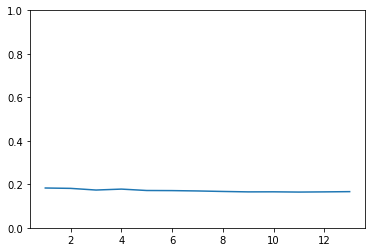

In [107]:
plt.figure(figsize=(6,4))
# plt.suptitle('RMSE for Features Used', fontsize=20, y=1.05)
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_)+min_features_to_select), abs(rfecv.grid_scores_))
# labels('', 'Number of Features Used', 'RMSE score')
plt.ylim([0,1])
plt.show()

In [108]:
features = pd.DataFrame(X_train_copy.columns)
features['ranking'] = rfecv.ranking_
features['support'] = rfecv.support_.astype('bool')
features[features['support'] == True]

,0,ranking,support
0,Age,1,True
2,MP,1,True
3,PTS,1,True
4,TRB,1,True
5,AST,1,True
6,STL,1,True
7,BLK,1,True
8,FG%,1,True
10,FT%,1,True
11,WS,1,True


In [109]:
features[features['support'] == False]

,0,ranking,support
1,G,2,False
9,3P%,3,False


In [110]:
rfecv.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True])

In [111]:
X_train_new = pd.DataFrame(X_train)
X_train_new.columns = X_train_copy.columns
X_train_new = X_train_new[X_train_copy.columns[rfecv.support_]]
X_train_new.shape

(758, 11)

In [112]:
X_test_new = X_test[X_train_copy.columns[rfecv.support_]]
X_test_new.shape

(253, 11)

In [113]:
from sklearn import metrics
def print_evaluate(true, pred):
    mae = metrics.mean_absolute_error(true, pred)
    mse = metrics.mean_squared_error(true, pred)
    rmse = np.sqrt(metrics.mean_squared_error(true, pred))
    r2 = metrics.r2_score(true, pred)
    print("Mean Absolute Error : %f" % mae)
    print("Mean Squared Error : %f" % mse)
    print("Root Mean Squared Error : %f" % rmse)
    print("R-Squared : %f" % r2)

In [114]:
reg.fit(X_train_new,y_train)
pred = reg.predict(X_test_new)
print_evaluate(y_test, pred)

Mean Absolute Error : 0.423296
Mean Squared Error : 0.207958
Root Mean Squared Error : 0.456024
R-Squared : -2.393705


In [ ]:
from sklearn.grid_search import GridSearchCV

